<a href="https://colab.research.google.com/github/LeonardoCarCampos/My-Portifolio/blob/main/FIFA2021_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import all packages and set plots to be inline
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Carregar o arquivo CSV
df = pd.read_csv("/content/drive/My Drive/Project_FIFA_2021/fifa21_raw_data.csv")

# Visualizar as primeiras linhas do DataFrame
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [28]:
#some of the 77 columns arent needed so they will be dropped
columns_to_drop = ['photoUrl','playerUrl','Loan Date End', 'Release Clause']
df = df.drop(columns = columns_to_drop)

In [29]:
#splitting team and contract into 2 seperate columns
df['Team & Contract'] = df['Team & Contract'].astype('str')
df['Team & Contract'].replace('\n', '', regex=True, inplace=True)
test = df['Team & Contract'][0]
Team = []
Contract_Duration = []
for x in range(len(df['Team & Contract'])):
    Team.append(str(df['Team & Contract'][x][:-11]))
    c = str(df['Team & Contract'][x][-11:])
    if c.startswith("2") == True:
        Contract_Duration.append(c)
    else:
        Contract_Duration.append("0")
df = df.drop(columns = ['Team & Contract'])
df['Team'] = Team
df['Contract Duration'] = Contract_Duration

In [30]:
df.head()


,LongName,Nationality,Positions,Name,Age,↓OVA,POT,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Value,Wage,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team,Contract Duration
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",€67.5M,€560K,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372,FC Barcelona,2004 ~ 2021
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",€46M,€220K,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344,Juventus,2018 ~ 2022
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",€75M,€125K,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86,Atlético Madrid,2014 ~ 2023
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",€87M,€370K,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163,Manchester City,2015 ~ 2023
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",€90M,€270K,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273,Paris Saint-Germain,2017 ~ 2022


In [36]:
hits = []
for x in range(len(df["Hits"])):
    s = str(df["Hits"][x])
    # Verificar se a string não está vazia
    if s != '':
        s = s[1:].replace('K','00').replace('.','')
        hits.append(s)
    else:
        # Se a string estiver vazia, adicionar None à lista
        hits.append(None)

# Atualizar a coluna "Hits" com os valores processados
df['Hits'] = hits

# Converter a coluna "Hits" para inteiros, ignorando valores nulos
df['Hits'] = pd.to_numeric(df['Hits'], errors='coerce').astype('Int64')


In [37]:
#will have to convert Joined to proper date-time format
df['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974     Aug 1, 2020
18975     Aug 1, 2020
18976    Jul 13, 2018
18977     Aug 1, 2020
18978     Jan 1, 2020
Name: Joined, Length: 18979, dtype: object

In [38]:
#Switching string of months to interger equivelents, wish we could use a case statement
def month_to_number(x):
            if x== 'Jan':
                return 1
            elif x == 'Feb':
                return 2
            elif x == 'Mar':
                return 3
            elif x == 'Apr':
                return 4
            elif x == 'May':
                return 5
            elif x == 'Jun':
                return 6
            elif x == 'Jul':
                return 7
            elif x == 'Aug':
                return 8
            elif x == 'Sep':
                return 9
            elif x == 'Oct':
                return 10
            elif x == 'Nov':
                return 11
            elif x == 'Dec':
                return 12

In [39]:
date = []
for x in range(len(df['Joined'])):
    d = df['Joined'][x]
    c = d.split(" ")
    month = str(month_to_number(c[0]))
    day = str(c[1].replace(',',''))
    year = str(c[2])
    if len(day) == 1:
        day = ('0'+str(day))
    date_long = (str(month)+'/'+str(day)+'/'+str(year))
    date_con = pd.to_datetime(date_long)
    date.append(date_con)

In [40]:
df['Joined'] = date
df['Joined']

0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
           ...    
18974   2020-08-01
18975   2020-08-01
18976   2018-07-13
18977   2020-08-01
18978   2020-01-01
Name: Joined, Length: 18979, dtype: datetime64[ns]

In [41]:
#height to inches
temp_height = []
for x in range(len(df['Height'])):
    x = df['Height'][x].replace('"', '').split("'")
    inches = int(x[0]) * 12 + int(x[1])
    temp_height.append(inches)
df['Height'] = temp_height
df['Height']

0        67
1        74
2        74
3        71
4        69
         ..
18974    70
18975    67
18976    70
18977    69
18978    69
Name: Height, Length: 18979, dtype: int64

In [42]:
#weight in lbs
temp_weight= []
for x in range(len(df['Weight'])):
    temp_weight.append(int(df['Weight'][x].replace('lbs','')))

df['Weight'] = temp_weight
df['Weight']

0        159
1        183
2        192
3        154
4        150
        ... 
18974    154
18975    128
18976    146
18977    143
18978    150
Name: Weight, Length: 18979, dtype: int64

In [43]:
#value
temp_value = []
for x in range(len(df['Value'])):
    value = df['Value'][x]
    value = value.replace('€','')
    value = value.replace('K','000')
    value = value.replace('M','000000')
    value = value.replace('.','F')
    if  'F' in value:
        value = value.replace('F','')
        value = value = int(value) / 10
    temp_value.append(int(value))

df['Value']= temp_value
df['Value']

0        67500000
1        46000000
2        75000000
3        87000000
4        90000000
           ...   
18974       35000
18975       60000
18976       40000
18977       60000
18978       60000
Name: Value, Length: 18979, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   LongName           18979 non-null  object        
 1   Nationality        18979 non-null  object        
 2   Positions          18979 non-null  object        
 3   Name               18979 non-null  object        
 4   Age                18979 non-null  int64         
 5   ↓OVA               18979 non-null  int64         
 6   POT                18979 non-null  int64         
 7   ID                 18979 non-null  int64         
 8   Height             18979 non-null  int64         
 9   Weight             18979 non-null  int64         
 10  foot               18979 non-null  object        
 11  BOV                18979 non-null  int64         
 12  BP                 18979 non-null  object        
 13  Growth             18979 non-null  int64         
 14  Joined

In [45]:
#Wage
Temp_Wage = []
for x in range(len(df['Wage'])):
    Wage = df['Wage'][x]
    Wage = Wage.replace('€','')
    Wage = Wage.replace('K','000')
    Wage = Wage.replace('M','000000')
    Wage = Wage.replace('.','F')
    if  'F' in Wage:
        Wage = Wage.replace('F','')
        Wage = Wage = int(Wage) / 10
    Temp_Wage.append(int(Wage))

df['Wage']= Temp_Wage
df['Wage']

0        560000
1        220000
2        125000
3        370000
4        270000
          ...  
18974      1000
18975       500
18976      1000
18977       500
18978       500
Name: Wage, Length: 18979, dtype: int64

In [46]:
#positions
df['Positions'].unique()
#far too many unique groupings of positions will need to order them to reduce size

array(['RW ST CF', 'ST LW', 'GK', 'CAM CM', 'LW CAM', 'ST', 'ST LW RW',
       'RW', 'LW', 'CB', 'CDM', 'CF ST', 'CDM CM', 'CDM RB', 'CF CAM',
       'LW RW', 'LW ST', 'CM', 'RM LM CAM', 'RB', 'RW CAM CM', 'LB', 'CF',
       'LM CF', 'ST CF LW', 'RW LW', 'CM CDM', 'CAM RM RW', 'CAM CF ST',
       'CAM RM CF', 'LM ST', 'CM CDM CAM', 'LM', 'CAM RW', 'CB CDM',
       'RM LM RW', 'RW RM', 'CF LW CAM', 'CAM CM CF', 'LW CF', 'CM RM LM',
       'LB LM', 'CAM CM RM', 'CAM CF', 'LM RM LW', 'LM LB CM', 'CM LM LB',
       'RM CM', 'CAM CM LW', 'CB LB', 'RM RB', 'ST RW', 'LM RW LW',
       'RM RW', 'RB LB', 'RB RM', 'RM', 'CAM RM', 'RB RWB', 'CDM CB CM',
       'LM LW RM', 'CM CAM', 'CAM RM ST', 'LM RM', 'LM LWB', 'ST RM CF',
       'RW RM CF', 'LM RM CF', 'RM CF', 'RB CM', 'LW CAM RW', 'CAM LW CM',
       'CM CAM CDM', 'RW LW CAM', 'CM CAM LM', 'CM RM ST', 'CDM CM RB',
       'ST CAM', 'RM ST', 'LB CB LWB', 'CAM LW ST', 'RWB RM', 'CB CDM LB',
       'CM LM RM', 'LM LW', 'RW LW RM', 'RB CDM CM', '

In [47]:
temp_position = []
for x in range(len(df['Positions'])):
    y = sorted(df['Positions'][x].split(" "))
    yx = ' '.join(y)
    temp_position.append(yx)

df['Positions'] = temp_position
df['Positions'] = df['Positions'].astype(object)
df['Positions'].unique()
#ordered the list of positions leaving them in groups

array(['CF RW ST', 'LW ST', 'GK', 'CAM CM', 'CAM LW', 'ST', 'LW RW ST',
       'RW', 'LW', 'CB', 'CDM', 'CF ST', 'CDM CM', 'CDM RB', 'CAM CF',
       'LW RW', 'CM', 'CAM LM RM', 'RB', 'CAM CM RW', 'LB', 'CF', 'CF LM',
       'CF LW ST', 'CAM RM RW', 'CAM CF ST', 'CAM CF RM', 'LM ST',
       'CAM CDM CM', 'LM', 'CAM RW', 'CB CDM', 'LM RM RW', 'RM RW',
       'CAM CF LW', 'CAM CF CM', 'CF LW', 'CM LM RM', 'LB LM',
       'CAM CM RM', 'LM LW RM', 'CM LB LM', 'CM RM', 'CAM CM LW', 'CB LB',
       'RB RM', 'RW ST', 'LM LW RW', 'LB RB', 'RM', 'CAM RM', 'RB RWB',
       'CB CDM CM', 'CAM RM ST', 'LM RM', 'LM LWB', 'CF RM ST',
       'CF RM RW', 'CF LM RM', 'CF RM', 'CM RB', 'CAM LW RW', 'CAM CM LM',
       'CM RM ST', 'CDM CM RB', 'CAM ST', 'RM ST', 'CB LB LWB',
       'CAM LW ST', 'RM RWB', 'CB CDM LB', 'LM LW', 'LW RM RW', 'CM LM',
       'LB LM RM', 'LW RM ST', 'CAM CM ST', 'LB LWB', 'CB RB', 'RM RW ST',
       'LWB', 'CAM LM', 'CAM', 'RB RM RW', 'CF LM LW', 'CAM LM LW',
       'CB RB RWB'

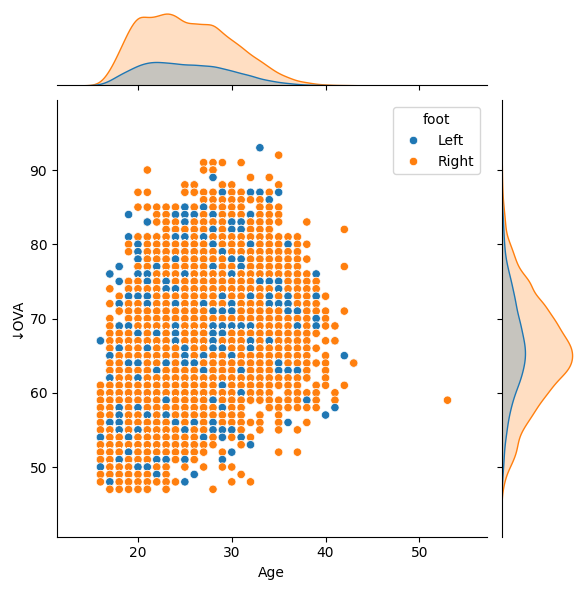

In [48]:
sns.jointplot(data=df, x="Age", y="↓OVA", hue="foot")

In [49]:
df.loc[df['Age'] == 53, ['LongName', 'Nationality', 'Team']]
#The oldest Fifa Player plays for a Japanese Team

,LongName,Nationality,Team
16121,Kazuyoshi Miura,Japan,Yokohama FC


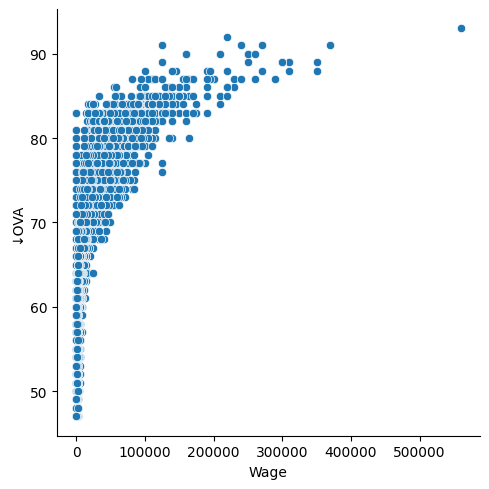

In [50]:
sns.relplot(data=df, x="Wage", y="↓OVA")
#It seems the best performing players are naturally paid the most with one player costing the most by far

In [51]:
df.head()

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Value,Wage,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team,Contract Duration
0,Lionel Messi,Argentina,CF RW ST,L. Messi,33,93,93,158023,67,159,Left,93,RW,0,2004-07-01,67500000,560000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,372,FC Barcelona,2004 ~ 2021
1,C. Ronaldo dos Santos Aveiro,Portugal,LW ST,Cristiano Ronaldo,35,92,92,20801,74,183,Right,92,ST,0,2018-07-10,46000000,220000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,344,Juventus,2018 ~ 2022
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,200389,74,192,Right,91,GK,2,2014-07-16,75000000,125000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,86,Atlético Madrid,2014 ~ 2023
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,71,154,Right,91,CAM,0,2015-08-30,87000000,370000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,163,Manchester City,2015 ~ 2023
4,Neymar da Silva Santos Jr.,Brazil,CAM LW,Neymar Jr,28,91,91,190871,69,150,Right,91,LW,0,2017-08-03,90000000,270000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,273,Paris Saint-Germain,2017 ~ 2022


In [52]:
data.describe()

,Age,↓OVA,POT,ID,BOV,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,25.194583,65.718636,71.136098,226404.790242,66.751620,5.417461,248.938616,49.688551,45.842932,51.941883,58.768007,42.697244,256.481848,55.587913,47.248116,42.392012,52.725012,58.528795,317.721007,64.357922,64.413088,63.367617,61.655619,63.926761,296.606618,57.802413,64.577006,62.654724,64.786132,46.786343,254.200379,55.590969,46.394067,50.299858,53.857158,48.058328,58.073608,139.908689,46.558828,47.705359,45.644502,81.436693,16.416197,16.207124,16.076558,16.217609,16.519205,1595.293851,355.703040,67.454239,53.457716,57.681069,62.875494,49.865904,64.368618
std,4.710753,6.968999,6.114176,27141.673349,6.747017,5.663954,74.299764,18.131334,19.566978,17.293626,14.518995,17.647116,78.652897,18.761660,18.208857,17.228069,15.177695,16.566286,55.881422,14.890208,14.638874,14.597144,9.072114,14.062703,50.733368,13.308980,11.844592,15.804986,12.488690,19.300862,64.596228,17.140038,20.697516,19.429171,13.708607,15.655890,12.079042,61.218624,20.138813,21.367322,20.922167,84.665579,17.554221,16.816305,16.491064,17.002134,17.854185,269.883542,40.762282,10.678058,13.827229,10.081914,9.927875,16.442730,9.601665
min,16.000000,47.000000,47.000000,41.000000,48.000000,0.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,21.000000,61.000000,67.000000,210135.000000,62.000000,0.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.000000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,25.000000,66.000000,71.000000,232424.000000,67.000000,4.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.000000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,6

In [53]:
#the top 10 most paid players
most_payed = df.nlargest(n=10, columns=['Wage'], keep='all')
most_payed[["Wage",'LongName', 'Nationality', 'Team','↓OVA']]

,Wage,LongName,Nationality,Team,↓OVA
0,560000,Lionel Messi,Argentina,FC Barcelona,93
3,370000,Kevin De Bruyne,Belgium,Manchester City,91
15,350000,Karim Benzema,France,Real Madrid,89
25,350000,Eden Hazard,Belgium,Real Madrid,88
12,310000,Carlos Henrique Venancio Casimiro,Brazil,Real Madrid,89
26,310000,Toni Kroos,Germany,Real Madrid,88
16,300000,Sergio Ramos García,Spain,Real Madrid,89
17,300000,Sergio Agüero,Argentina,Manchester City,89
37,290000,Antoine Griezmann,France,FC Barcelona,87
4,270000,Neymar da Silva Santos Jr.,Brazil,Paris Saint-Germain,91


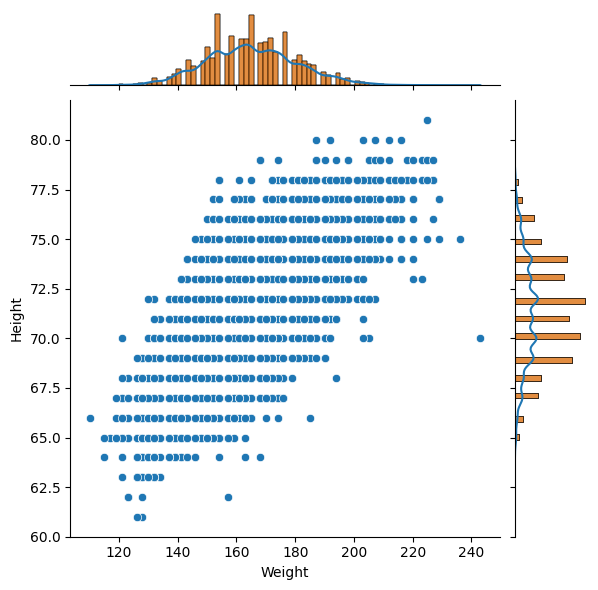

In [54]:
g = sns.JointGrid(data=df, x="Weight", y="Height")
g.plot_marginals(sns.histplot, kde=True)
g.plot(sns.scatterplot, sns.histplot)

In [55]:
heavyiest = df.nlargest(n=5, columns=['Weight'], keep='all')
heavyiest[["Weight",'LongName', 'Nationality', 'Team','↓OVA']]
#the heaviest player is Adebayo Akinfenwa from England

,Weight,LongName,Nationality,Team,↓OVA
10336,243,Adebayo Akinfenwa,England,Wycombe Wanderers,65
9488,236,Chris Seitz,United States,DC United,66
4519,229,Obbi Oularé,Belgium,Standard de Liège,71
4652,229,Fabien Farnolle,Benin,BB Erzurumspor,70
13608,229,Dennis Corozo,Ecuador,Delfín SC,62


In [56]:
Tallest = df.nlargest(n=5, columns=['Height'], keep='all')
Tallest[["Height",'LongName', 'Nationality', 'Team','↓OVA']]
#the tallest player is Tomáš Holý from the Czech Republic

,Height,LongName,Nationality,Team,↓OVA
10305,81,Tomáš Holý,Czech Republic,Ipswich Town,65
4124,80,Costel Pantilimon,Romania,Denizlispor,71
6615,80,Vanja Milinković-Savić,Serbia,Torino,68
8304,80,Kjell Scherpen,Netherlands,Ajax,67
10905,80,Abdoul Ba,Mauritania,AJ Auxerre,64
11216,80,Stefan Maierhofer,Austria,FC Admira Wacker Mödling,64
18191,80,Demba Thiam,Senegal,SPAL,53


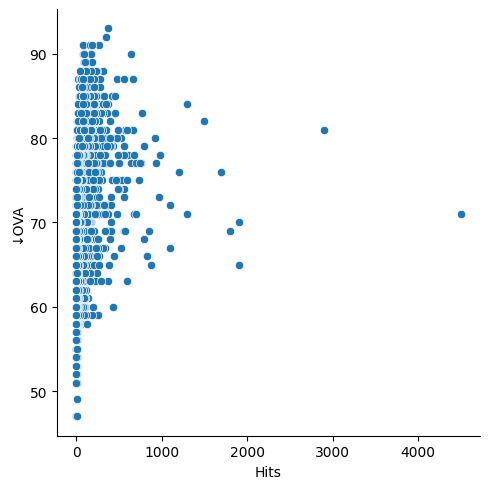

In [57]:
g = sns.relplot(x="Hits", y="↓OVA", data=df)

In [58]:
most_hits = df.nlargest(n=5, columns=['Hits'], keep='all')
most_hits[["Hits",'LongName', 'Nationality', 'Team','↓OVA']]
#the tallest player is Tomáš Holý from the Czech Republic

,Hits,LongName,Nationality,Team,↓OVA
4064,4500,Reinier Jesus Carvalho,Brazil,"Borussia DortmundJun 30, 2",71
279,2900,Marc Cucurella Saseta,Spain,Getafe CF,81
4680,1900,Giovanni Reyna,United States,Borussia Dortmund,70
9707,1900,Enzo Loiodice,France,UD Las Palmas,65
6203,1800,Jude Bellingham,England,Borussia Dortmund,69
